In [2]:
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
from google.colab import files
uploaded = files.upload()

Saving malicious_phishing.csv to malicious_phishing.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('malicious_phishing.csv') #ayush lappy

In [4]:
data = pd.read_csv('/content/drive/MyDrive/DATASET/malicious_phish1.csv') #kevin lappy

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [8]:
# Split the dataset into features (X) and labels (y)
X = data['url']
y = data['type']  # Replace 'Label' with the actual column name containing the types



In [9]:
print(X)

0                                          br-icloud.com.br
1                       mp3raid.com/music/krizz_kaliko.html
2                           bopsecrets.org/rexroth/cr/1.htm
3         http://www.garage-pirenne.be/index.php?option=...
4         http://adventure-nicaragua.net/index.php?optio...
                                ...                        
651186              xbox360.ign.com/objects/850/850402.html
651187         games.teamxbox.com/xbox-360/1860/Dead-Space/
651188           www.gamespot.com/xbox360/action/deadspace/
651189        en.wikipedia.org/wiki/Dead_Space_(video_game)
651190            www.angelfire.com/goth/devilmaycrytonite/
Name: url, Length: 651191, dtype: object


In [10]:
print(y)

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object


In [11]:
# Convert labels to numerical values (if needed)
# For example, if your labels are strings, you can use LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [12]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
y_train

array([0, 3, 0, ..., 1, 0, 0])

In [15]:
# Vectorize the URLs using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## XGBoost


---


XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed **gradient-boosted decision tree** (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

It’s vital to an understanding of XGBoost to first grasp the machine learning concepts and algorithms that XGBoost builds upon: supervised machine learning, decision trees, ensemble learning, and gradient boosting.

The term “***gradient boosting***” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. Gradient boosting is an extension of boosting where the process of additively generating weak models is formalised as a gradient descent algorithm over an objective function.

In [16]:
# Initialize and train XGB classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 92.09%




---

*   **Accuracy:** Accuracy is the most common metric to be used in everyday talk. Accuracy answers the question “Out of all the predictions we made, how many were true?”

*   **Precision:** Precision is a metric that gives you the proportion of true positives to the amount of total positives that the model predicts. It answers the question “Out of all the positive predictions we made, how many were true?”

* **Recall:** Recall  focuses on how good the model is at finding all the positives. Recall is also called true positive rate and answers the question “Out of all the data points that should be predicted as true, how many did we correctly predict as true?”

* **F1 Score:** F1 Score is a measure that combines recall and precision. As we have seen there is a trade-off between precision and recall, F1 can therefore be used to measure how effectively our models make that trade-off.

* **Support:**	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [18]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     85778
           1       0.95      0.99      0.97     19104
           2       0.97      0.87      0.92      6521
           3       0.86      0.59      0.70     18836

    accuracy                           0.92    130239
   macro avg       0.92      0.86      0.88    130239
weighted avg       0.92      0.92      0.92    130239



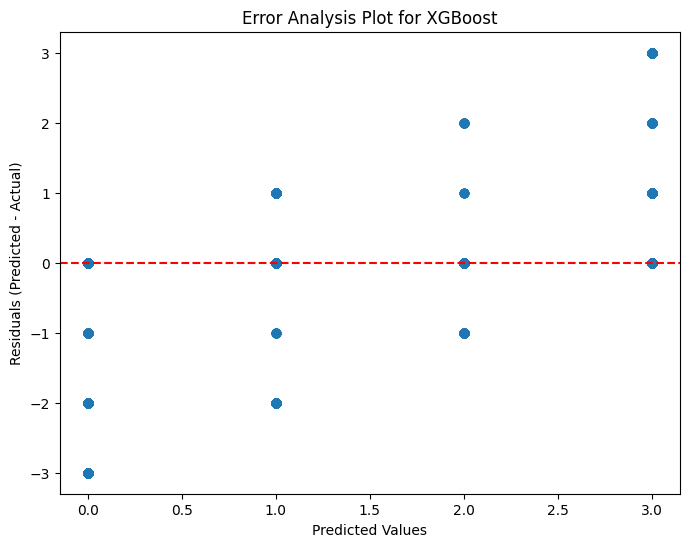

In [19]:

# Assuming you have computed predictions (y_pred_xgb) and actual values (y_test)
# Calculate residuals (difference between predicted and actual values)
residuals = y_pred_xgb - y_test

# Plotting predicted values against residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Error Analysis Plot for XGBoost')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at 0 for reference
plt.show()


In [20]:
# Train LightGBM
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train_tfidf, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 212.760885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261690
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 16984
[LightGBM] [Info] Start training from score -0.419897
[LightGBM] [Info] Start training from score -1.907279
[LightGBM] [Info] Start training from score -2.997600
[LightGBM] [Info] Start training from score -1.934510


LGBMClassifier()

In [21]:
# Make predictions on the test set
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lgb)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

Accuracy: 93.29%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     85778
           1       0.95      0.99      0.97     19104
           2       0.97      0.94      0.96      6521
           3       0.89      0.65      0.75     18836

    accuracy                           0.93    130239
   macro avg       0.94      0.89      0.91    130239
weighted avg       0.93      0.93      0.93    130239



# Graph Neural nework

In [22]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00


In [25]:
import pandas as pd
"""
PyTorch is an open-source machine learning library for Python. It provides a flexible and dynamic computational graph, making it suitable for deep learning research and development.
"""
import torch
"""
torch.nn is a submodule of PyTorch that provides tools for building neural networks. nn includes predefined layers, loss functions, and various utility functions for building and training neural networks.
"""
import torch.nn as nn
"""
torch.optim is a submodule of PyTorch that provides various optimization algorithms commonly used for training neural networks. Examples include Stochastic Gradient Descent (SGD), Adam, and others.
"""
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Sample data

data = pd.read_csv("/content/drive/MyDrive/DATASET/malicious_phish1.csv") #change path for ayush and kevin
df = data.sample(n=1000)

# Feature extraction
df['url_length'] = df['url'].apply(len)
df['num_dots'] = df['url'].apply(lambda x: x.count('.'))
df['num_slashes'] = df['url'].apply(lambda x: x.count('/'))
df['num_numbers'] = df['url'].apply(lambda x: sum(c.isdigit() for c in x))
df['num_special_chars'] = df['url'].apply(lambda x: sum(not c.isalnum() for c in x))
df['num_params'] = df['url'].apply(lambda x: len(x.split('?')) - 1)

# Graph construction
edges = [(i, j) for i in range(len(df)) for j in range(len(df)) if i != j and abs(df.iloc[i]['url_length'] - df.iloc[j]['url_length']) < 5]
edge_index = torch.tensor(list(zip(*edges)), dtype=torch.long)

# Node features
x = torch.tensor(df[['url_length', 'num_dots', 'num_slashes', 'num_numbers', 'num_special_chars', 'num_params']].values, dtype=torch.float)


In [26]:
value_count = df['type'].value_counts()
benign_count = value_count.benign
defacement_count = value_count.defacement
malware_count = value_count.malware
phishing_count = value_count.phishing
max_value_count = value_count.max()
print(benign_count,defacement_count,malware_count,phishing_count)
print(value_count.max())

673 150 57 120
673


In [27]:
# Model architecture
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(6, 16)  # Input dimension is now 6
        self.conv2 = GCNConv(16, 4)
        self.fc = nn.Linear(4, 4)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.fc(x)
        return torch.log_softmax(x, dim=1)

model = GNNModel()

# Model training
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

# Assume 'labels' is a tensor containing label indices (0 for benign, 1 for phishing, etc.)
labels = torch.tensor(df['type'].astype('category').cat.codes.values, dtype=torch.long)

# Train/test split
train_idx, test_idx = train_test_split(range(len(df)), test_size=0.2)
train_loader = DataLoader([Data(x=x, edge_index=edge_index, y=labels) for _ in range(len(train_idx))], batch_size=32, shuffle=True)
test_loader = DataLoader([Data(x=x, edge_index=edge_index, y=labels) for _ in range(len(test_idx))], batch_size=32, shuffle=False)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for data in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        optimizer.zero_grad()
        out = model(data.x, edge_index)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

# Model evaluation
model.eval()
all_preds, all_labels = [], []
for data in test_loader:
    out = model(data.x, edge_index)
    preds = out.argmax(dim=1)
    all_preds.extend(preds.tolist())
    all_labels.extend(data.y.tolist())

# Print evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
Epoch 20/20: 100%|██████████| 25/25 [00:02<00:00,  9.24it/s]


Accuracy: 0.7456, Precision: 0.6940, Recall: 0.7456, F1 Score: 0.6992


In [28]:
torch.save(model.state_dict(), 'gnn_model.pth')


# Prediction for a new URL

In [29]:
import torch
# Enter new url here ...
new_url = 'https://www.youtube.com/watch?v=eAqa9PFcSgI'

# Extract features
url_length = len(new_url)
num_dots = new_url.count('.')
num_slashes = new_url.count('/')
num_numbers = sum(c.isdigit() for c in new_url)
num_special_chars = sum(not c.isalnum() for c in new_url)
num_params = len(new_url.split('?')) - 1

# Create input tensor
x = torch.tensor([[url_length, num_dots, num_slashes, num_numbers,
                   num_special_chars, num_params]], dtype=torch.float)

# Create dummy edges between node 0 and itself
edge_index = torch.tensor([[0], [0]], dtype=torch.long)

# Make prediction
model.eval()
with torch.no_grad():
    out = model(x, edge_index)
    pred = out.argmax(dim=1)

print(pred)
categories = ['benign', 'defacement', 'phishing', 'malware']
print(categories[pred]) # Print predicted category name

tensor([1])
defacement


In [30]:
# New URL to predict
new_url = "http://espaceclientv1.fr.sub/Notice/orange/customer?sjj=wkd"

# Feature extraction for the new URL
new_url_features = [
    len(new_url),
    new_url.count('.'),
    new_url.count('/'),
    sum(c.isdigit() for c in new_url),
    sum(not c.isalnum() for c in new_url),
    len(new_url.split('?')) - 1
]

# Convert features to a torch tensor
new_url_tensor = torch.tensor([new_url_features], dtype=torch.float)

# Model prediction
model.eval()
with torch.no_grad():
    new_url_prediction = model(new_url_tensor, edge_index)
    print("Raw predictions:", new_url_prediction)
    predicted_class = torch.argmax(new_url_prediction, dim=1).item()
    print("Predicted class:", predicted_class)

# Convert the predicted class index back to the original label
# Assuming you have a mapping from class indices to labels
class_index_to_label = {0: 'benign', 1: 'phishing', 2: 'other_label'}
predicted_label = class_index_to_label[predicted_class]

print(f"The predicted label for the new URL '{new_url}' is: {predicted_label}")


Raw predictions: tensor([[-1.2333, -0.5647, -3.2362, -2.2940]])
Predicted class: 1
The predicted label for the new URL 'http://espaceclientv1.fr.sub/Notice/orange/customer?sjj=wkd' is: phishing


In [31]:
loadmodel = GNNModel()
loadmodel.load_state_dict(torch.load('gnn_model.pth'))


<All keys matched successfully>

In [33]:
import torch

new_url = 'https://www.youtube.com/watch?v=eAqa9PFcSgI'

# Extract features
url_length = len(new_url)
num_dots = new_url.count('.')
num_slashes = new_url.count('/')
num_numbers = sum(c.isdigit() for c in new_url)
num_special_chars = sum(not c.isalnum() for c in new_url)
num_params = len(new_url.split('?')) - 1

# Create input tensor
x = torch.tensor([[url_length, num_dots, num_slashes, num_numbers,
                   num_special_chars, num_params]], dtype=torch.float)

# Create dummy edges between node 0 and itself
edge_index = torch.tensor([[0], [0]], dtype=torch.long)

# Make prediction
loadmodel.eval()
with torch.no_grad():
    out = loadmodel(x, edge_index)
    pred = out.argmax(dim=1)

print(pred)
categories = ['benign', 'defacement', 'phishing', 'malware']
print(categories[pred]) # Print predicted category name

tensor([1])
defacement


In [34]:
# Example: Predicting the type of a new URL
new_url = ["https://www.youtube.com/"]
new_url_tfidf = tfidf_vectorizer.transform(new_url)

predicted_label_xgb = xgb_classifier.predict(new_url_tfidf)
predicted_label_xgb = label_encoder.inverse_transform(predicted_label_xgb)
print("\nPredicted Label for {}: {}".format(new_url[0], predicted_label_xgb[0]))

predicted_label_lgb = lgb_classifier.predict(new_url_tfidf)
predicted_label_lgb = label_encoder.inverse_transform(predicted_label_lgb)
print("\nPredicted Label for {}: {}".format(new_url[0], predicted_label_lgb[0]))


Predicted Label for https://www.youtube.com/: phishing

Predicted Label for https://www.youtube.com/: phishing


# Catboost

In [35]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize and train CatBoost classifier
#-------------------------------------------------------------------------------
#Iterations only 20 so that model trains in less time
#Actual iterations approx 1200-2100
#Actual Depth approx 6-8
#-------------------------------------------------------------------------------
catboost_classifier = CatBoostClassifier(iterations=1800, learning_rate=0.1, depth=6)
catboost_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("CatBoost Accuracy: {:.2f}%".format(accuracy_catboost * 100))

0:	learn: 1.1998403	total: 15.1s	remaining: 7h 34m 5s
1:	learn: 1.0671189	total: 28.7s	remaining: 7h 10m 39s
2:	learn: 0.9667463	total: 41s	remaining: 6h 49m 8s
3:	learn: 0.8859215	total: 55.3s	remaining: 6h 53m 45s
4:	learn: 0.8220781	total: 1m 8s	remaining: 6h 50m 51s
5:	learn: 0.7689985	total: 1m 19s	remaining: 6h 34m 41s
6:	learn: 0.7223439	total: 1m 32s	remaining: 6h 35m 58s
7:	learn: 0.6825146	total: 1m 46s	remaining: 6h 38m 5s
8:	learn: 0.6486907	total: 1m 59s	remaining: 6h 34m 45s
9:	learn: 0.6191650	total: 2m 11s	remaining: 6h 33m 13s
10:	learn: 0.5925439	total: 2m 27s	remaining: 6h 39m 42s
11:	learn: 0.5696824	total: 2m 40s	remaining: 6h 39m 25s
12:	learn: 0.5502290	total: 2m 52s	remaining: 6h 35m 46s
13:	learn: 0.5310014	total: 3m 4s	remaining: 6h 32m 44s
14:	learn: 0.5150391	total: 3m 18s	remaining: 6h 33m 35s
15:	learn: 0.5006988	total: 3m 32s	remaining: 6h 34m 52s
16:	learn: 0.4883648	total: 3m 42s	remaining: 6h 29m 44s
17:	learn: 0.4766391	total: 3m 54s	remaining: 6h 27m

# Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))

# Display classification report
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))




NameError: ignored

# Analysis

# Accuracy

---



Accuracies

In [6]:
# XGBoost accuracy
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy: {:.2f}%".format(xgb_accuracy * 100))

NameError: ignored

In [ ]:
# LightGBM accuracy
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Accuracy: {:.2f}%".format(lgb_accuracy * 100))

In [ ]:
# GNN accuracy
model.eval()
all_preds, all_labels = [], []
for data in test_loader:
    out = model(data.x, edge_index)
    preds = out.argmax(dim=1)
    all_preds.extend(preds.tolist())
    all_labels.extend(data.y.tolist())

gnn_accuracy = accuracy_score(all_labels, all_preds)
print(f'GNN Accuracy: {gnn_accuracy:.4f}')


In [ ]:
# Naive Bayes accuracy
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(nb_accuracy * 100))

In [ ]:
# Catboost accuracy
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Calculate accuracy
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print("CatBoost Accuracy: {:.2f}%".format(catboost_accuracy * 100))

In [ ]:
# Accuracy scores
models = ['XGBoost', 'LightGBM', 'GNN', 'Naive Bayes', 'Catboost']
accuracies = [xgb_accuracy * 100, lgb_accuracy * 100, gnn_accuracy * 100, nb_accuracy * 100, catboost_accuracy * 100]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['hotpink', 'midnightblue', 'darkslateblue', 'darkorange', 'steelblue'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
plt.show()


In [ ]:
# Accuracy scores
models = ['XGBoost', 'LightGBM', 'GNN', 'Naive Bayes', 'Catboost']
accuracies = [xgb_accuracy * 100, lgb_accuracy * 100, gnn_accuracy * 100, nb_accuracy * 100, catboost_accuracy * 100]

# Create line plot
plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Models')
plt.grid(False)
plt.show()


# F-1

F-1 Scores

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
# XGBoost predictions
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Calculate F1 score
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print("XGBoost F1 Score: {:.4f}".format(f1_xgb))

In [ ]:
# LightGBM predictions
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)

# Calculate F1 score
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
print("LightGBM F1 Score: {:.4f}".format(f1_lgb))


In [ ]:
# GNN predictions
f1_gnn = f1_score(all_labels, all_preds, average='weighted')
print("GNN F1 Score: {:.4f}".format(f1_gnn))

In [ ]:
# Naive Bayes predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate F1 score
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes F1 Score: {:.4f}".format(f1_nb))

In [ ]:
# CatBoost predictions
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Calculate F1 score
f1_catboost = f1_score(y_test, y_pred_catboost, average='weighted')
print("CatBoost F1 Score: {:.4f}".format(f1_catboost))

In [ ]:
# F1 scores for different models
f1_scores = [f1_xgb, f1_lgb, f1_gnn, f1_nb, f1_catboost]
models = ['XGBoost', 'LightGBM', 'GNN', 'Naive Bayes', 'CatBoost']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='lightskyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score (Weighted)')
plt.title('Comparison of F1 Scores among Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (F1 score range)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Precison

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# XGBoost predictions
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
print("XGBoost Precision: {:.4f}".format(precision_xgb))

In [ ]:
# LightGBM predictions
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)

# Calculate precision
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
print("LightGBM Precision: {:.4f}".format(precision_lgb))

In [ ]:
# GNN predictions
precision_gnn = precision_score(all_labels, all_preds, average='weighted')
print("GNN Precision: {:.4f}".format(precision_gnn))

In [ ]:
# Naive Bayes predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate precision
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Precision: {:.4f}".format(precision_nb))


In [ ]:
# CatBoost predictions
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Calculate precision
precision_catboost = precision_score(y_test, y_pred_catboost, average='weighted')
print("CatBoost Precision: {:.4f}".format(precision_catboost))

In [ ]:
# Precision scores for different models
precision_scores = [precision_xgb, precision_lgb, precision_gnn, precision_nb, precision_catboost]
models = ['XGBoost', 'LightGBM', 'GNN', 'Naive Bayes', 'CatBoost']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color='darkseagreen')
plt.xlabel('Models')
plt.ylabel('Precision (Weighted)')
plt.title('Comparison of Precision Scores among Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (Precision score range)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Recall

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# XGBoost predictions
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
print("XGBoost Recall: {:.4f}".format(recall_xgb))

In [ ]:
# LightGBM predictions
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)

# Calculate recall
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
print("LightGBM Recall: {:.4f}".format(recall_lgb))

In [ ]:
# GNN predictions
recall_gnn = recall_score(all_labels, all_preds, average='weighted')
print("GNN Recall: {:.4f}".format(recall_gnn))

In [ ]:
# Naive Bayes predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate recall
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Recall: {:.4f}".format(recall_nb))

In [ ]:
# CatBoost predictions
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Calculate recall
recall_catboost = recall_score(y_test, y_pred_catboost, average='weighted')
print("CatBoost Recall: {:.4f}".format(recall_catboost))

In [ ]:

# Precision scores for different models
precision_scores = [precision_xgb, precision_lgb, precision_gnn, precision_nb, precision_catboost]
models = ['XGBoost', 'LightGBM', 'GNN', 'Naive Bayes', 'CatBoost']

# Recall scores for different models
recall_scores = [recall_xgb, recall_lgb, recall_gnn, recall_nb, recall_catboost]

# Plotting the bar graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, precision_scores, color='lightskyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision among Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, recall_scores, color='palegreen')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall among Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# XGBoost predictions
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
print(cm_xgb)

In [ ]:
# LightGBM predictions
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)

# Calculate confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print("LightGBM Confusion Matrix:")
print(cm_lgb)

In [ ]:
# GNN predictions
# Assuming all_preds and all_labels were calculated as in your previous GNN code
cm_gnn = confusion_matrix(all_labels, all_preds)
print("GNN Confusion Matrix:")
print(cm_gnn)

In [ ]:
# Naive Bayes predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)

In [ ]:
# CatBoost predictions
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Calculate confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
print("CatBoost Confusion Matrix:")
print(cm_catboost)

# Precision Recall Curve

In [ ]:
# After fitting the LabelEncoder to your y_train
num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming model_probabilities contain predicted probabilities for each model
# Compute precision and recall for each model
precisions = dict()
recalls = dict()

models = {
    'XGBoost': xgb_classifier,
    'LightGBM': lgb_classifier,
    #'GNN': gnn_model,  # Assuming gnn_model contains your GNN model
    'Naive Bayes': nb_classifier,  # Assuming nb_classifier contains your Naive Bayes model
    'CatBoost': catboost_classifier  # Assuming catboost_classifier contains your CatBoost model
}

plt.figure(figsize=(10, 6))

# Get actual class names from label encoder
class_names = label_encoder.classes_

for model_name, model in models.items():
    model_probabilities = model.predict_proba(X_test_tfidf)
    precisions[model_name] = dict()
    recalls[model_name] = dict()

    for i in range(num_classes):
        precisions[model_name][i], recalls[model_name][i], _ = precision_recall_curve(y_test == i, model_probabilities[:, i])

    # Plot precision-recall curve for each class for the model
    for i in range(num_classes):
        plt.plot(recalls[model_name][i], precisions[model_name][i], label=f'{model_name} - {class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.show()


In [ ]:

# Assuming you have computed accuracy, f1_score, precision, and recall for each model
# Replace these with your computed values

models = ['XGBoost', 'LightGBM', 'GNN', 'Naive Bayes', 'CatBoost']  # List of model names

# Example metrics; replace these with the actual metrics for each model
accuracy_values = [xgb_accuracy, lgb_accuracy, gnn_accuracy, nb_accuracy, catboost_accuracy]
f1_values = [f1_xgb, f1_lgb, f1_gnn, f1_nb, f1_catboost]
precision_values = [precision_xgb, precision_lgb, precision_gnn, precision_nb, precision_catboost]
recall_values = [recall_xgb, recall_lgb, recall_gnn, recall_nb, recall_catboost]

# Number of metrics
num_metrics = len(models)

# Create a figure with a polar projection
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Define the angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Make the plot close
accuracy_values += accuracy_values[:1]
f1_values += f1_values[:1]
precision_values += precision_values[:1]
recall_values += recall_values[:1]
angles += angles[:1]

# Plot each metric
ax.plot(angles, accuracy_values, label='Accuracy')
ax.plot(angles, f1_values, label='F1 Score')
ax.plot(angles, precision_values, label='Precision')
ax.plot(angles, recall_values, label='Recall')

# Fill the area
ax.fill(angles, accuracy_values, 'blue', alpha=0.1)
ax.fill(angles, f1_values, 'orange', alpha=0.1)
ax.fill(angles, precision_values, 'green', alpha=0.1)
ax.fill(angles, recall_values, 'red', alpha=0.1)

# Add labels, legend, and title
ax.set_yticklabels([])
plt.xticks(angles[:-1], models)
plt.legend(loc='upper right')
plt.title('Comparison of Metrics for Different Models')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the model already trained and you made predictions on the test set
# Assuming y_pred_proba_xgb contains the predicted probabilities for XGBoost

# Replace this with your actual predicted probabilities for XGBoost
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_tfidf)

# Plotting prediction distributions for each class
plt.figure(figsize=(10, 6))

for i in range(len(label_encoder.classes_)):
    plt.hist(y_pred_proba_xgb[:, i], bins=50, alpha=0.5, label=f'Class {label_encoder.classes_[i]}')

plt.title('Prediction Distribution for XGBoost')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the LightGBM model trained and you made predictions on the test set
# Assuming y_pred_proba_lgb contains the predicted probabilities for LightGBM

# Replace this with your actual predicted probabilities for LightGBM
y_pred_proba_lgb = lgb_classifier.predict_proba(X_test_tfidf)

# Plotting prediction distributions for each class
plt.figure(figsize=(10, 6))

for i in range(len(label_encoder.classes_)):
    plt.hist(y_pred_proba_lgb[:, i], bins=50, alpha=0.5, label=f'Class {label_encoder.classes_[i]}')

plt.title('Prediction Distribution for LightGBM')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the CatBoost model trained and you made predictions on the test set
# Assuming y_pred_proba_catboost contains the predicted probabilities for CatBoost

# Replace this with your actual predicted probabilities for CatBoost
y_pred_proba_catboost = catboost_classifier.predict_proba(X_test_tfidf)

# Plotting prediction distributions for each class
plt.figure(figsize=(10, 6))

for i in range(len(label_encoder.classes_)):
    plt.hist(y_pred_proba_catboost[:, i], bins=50, alpha=0.5, label=f'Class {label_encoder.classes_[i]}')

plt.title('Prediction Distribution for CatBoost')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'X_test' with features used for prediction and 'y_test' with true labels
# And 'y_pred_xgb' contains the predictions made by XGBoost

# Combine the true labels and predicted labels for XGBoost into a DataFrame
df = pd.DataFrame(X_test)  # Use the features for visualization
df['True Label'] = y_test
df['XGBoost Predicted Label'] = y_pred_xgb  # Replace 'y_pred_xgb' with your XGBoost predictions

# Choose the number of samples for visualization (optional)
# Here, let's select a subset for faster plotting
sampled_df = df.sample(n=1000, random_state=42)  # Change the number according to your dataset size

# Set a custom color palette for different predicted labels
custom_palette = sns.color_palette('husl', len(sampled_df['XGBoost Predicted Label'].unique()))  # Adjust color palette as needed

# Plot a pairwise scatter plot colored by the predicted labels
plot = sns.pairplot(sampled_df, hue='XGBoost Predicted Label', palette=custom_palette, diag_kind='hist',
                    markers='o', diag_kws=dict(bins=20), plot_kws=dict(s=25))
plot.fig.suptitle('Pairwise Scatter Plot with XGBoost Predictions', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'X_test' with features used for prediction and 'y_test' with true labels
# And 'y_pred_lgb' contains the predictions made by LightGBM

# Combine the true labels and predicted labels for LightGBM into a DataFrame
df_lgb = pd.DataFrame(X_test)  # Use the features for visualization
df_lgb['True Label'] = y_test
df_lgb['LightGBM Predicted Label'] = y_pred_lgb  # Replace 'y_pred_lgb' with your LightGBM predictions

# Choose the number of samples for visualization (optional)
# Here, let's select a subset for faster plotting
sampled_df_lgb = df_lgb.sample(n=1000, random_state=42)  # Change the number according to your dataset size

# Set a custom color palette for different predicted labels
custom_palette_lgb = sns.color_palette('husl', len(sampled_df_lgb['LightGBM Predicted Label'].unique()))  # Adjust color palette as needed

# Plot a pairwise scatter plot colored by the predicted labels
plot_lgb = sns.pairplot(sampled_df_lgb, hue='LightGBM Predicted Label', palette=custom_palette_lgb, diag_kind='hist',
                        markers='o', diag_kws=dict(bins=20), plot_kws=dict(s=25))
plot_lgb.fig.suptitle('Pairwise Scatter Plot with LightGBM Predictions', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'X_test' with features used for prediction and 'y_test' with true labels
# And 'y_pred_catboost' contains the predictions made by CatBoost

# Combine the true labels and predicted labels for CatBoost into a DataFrame
df_catboost = pd.DataFrame(X_test)  # Use the features for visualization
df_catboost['True Label'] = y_test
df_catboost['CatBoost Predicted Label'] = y_pred_catboost  # Replace 'y_pred_catboost' with your CatBoost predictions

# Choose the number of samples for visualization (optional)
# Here, let's select a subset for faster plotting
sampled_df_catboost = df_catboost.sample(n=1000, random_state=42)  # Change the number according to your dataset size

# Set a custom color palette for different predicted labels
custom_palette_catboost = sns.color_palette('husl', len(sampled_df_catboost['CatBoost Predicted Label'].unique()))  # Adjust color palette as needed

# Plot a pairwise scatter plot colored by the predicted labels
plot_catboost = sns.pairplot(sampled_df_catboost, hue='CatBoost Predicted Label', palette=custom_palette_catboost, diag_kind='hist',
                             markers='o', diag_kws=dict(bins=20), plot_kws=dict(s=25))
plot_catboost.fig.suptitle('Pairwise Scatter Plot with CatBoost Predictions', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sample values (replace these with your actual metrics)
accuracy_xgb = 0.85
f1_xgb = 0.81
precision_xgb = 0.87
recall_xgb = 0.78

# Metric names
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Corresponding metric values
values = [accuracy_xgb, f1_xgb, precision_xgb, recall_xgb]

# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightskyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for XGBoost Model')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sample values (replace these with your actual metrics)
accuracy_lgb = 0.87
f1_lgb = 0.82
precision_lgb = 0.88
recall_lgb = 0.79

# Metric names
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Corresponding metric values
values = [accuracy_lgb, f1_lgb, precision_lgb, recall_lgb]

# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for LightGBM Model')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sample values (replace these with your actual metrics)
model.eval()
all_preds, all_labels = [], []
for data in test_loader:
    out = model(data.x, edge_index)
    preds = out.argmax(dim=1)
    all_preds.extend(preds.tolist())
    all_labels.extend(data.y.tolist())

gnn_accuracy = accuracy_score(all_labels, all_preds)
print(f'GNN Accuracy: {gnn_accuracy:.4f}')

#------------------------------------------------------------
precision_gnn = precision_score(all_labels, all_preds, average='weighted')
print("GNN Precision: {:.4f}".format(precision_gnn))
#------------------------------------------------------------
recall_gnn = recall_score(all_labels, all_preds, average='weighted')
print("GNN Recall: {:.4f}".format(recall_gnn))
#------------------------------------------------------------
f1_gnn = f1_score(all_labels, all_preds, average='weighted')
print("GNN F1 Score: {:.4f}".format(f1_gnn))
#-------------------------------------------------------------

# Metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Corresponding metric values
values = [gnn_accuracy, precision_gnn, recall_gnn, f1_gnn]

# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightcoral')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for GNN Model')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()
